In [1]:
import pandas as pd
import datetime
import numpy as np
import scipy.stats as stats
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os

#!pip install ipython-sql
%reload_ext sql

In [6]:
date_cols = ["Filing Date", "Issuance Date", "Expiration Date", "Job Start Date"]
permits = pd.read_csv("Historical_DOB_Permit_Issuance.csv", low_memory=False, parse_dates=date_cols)
POPULATION = pd.read_csv(r"2010+Census+Population+By+Zipcode+(ZCTA).csv", low_memory=False)

In [56]:
# Check to see dates imported as datetime64
permits[date_cols].dtypes

Filing Date        datetime64[ns]
Issuance Date      datetime64[ns]
Expiration Date    datetime64[ns]
Job Start Date     datetime64[ns]
dtype: object

In [8]:
#Job Start Date Column is an object. Need to convert to datetime64
permits['Job Start Date'] = pd.to_datetime(permits['Job Start Date'],errors="coerce")

In [9]:
#Check Columns again
columns = ["Filing Date", "Issuance Date", "Expiration Date", "Job Start Date"]
# columns need to reformat "Filing Date" "Issuance Date" "Expiration Date" "Job Start Date"

permits[date_cols].dtypes

Filing Date        datetime64[ns]
Issuance Date      datetime64[ns]
Expiration Date    datetime64[ns]
Job Start Date     datetime64[ns]
dtype: object

In [10]:
#Check for NaN values in the column
permits.isnull().sum()
# We are missing only 4 number and 4 streets but we are missing the block, lot and postcode, bldg type ... etc 
# of a great deal more than 4 observations. If the information is needed, we can probably look this information up. 
# (No need for imputation)

BOROUGH                                   0
BIN                                       0
Number                                    4
Street                                    4
Job #                                     0
Job doc. #                                0
Job Type                                  0
Self_Cert                            688837
Block                                   284
Lot                                     293
Community Board                         614
Postcode                                269
Bldg Type                             24097
Residential                          705895
Special District 1                   981418
Special District 2                  1047758
Work Type                            193057
Permit Status                          3660
Filing Status                             0
Permit Type                               0
Permit Sequence #                         0
Permit Subtype                       426168
Oil Gas                         

In [11]:
#We are missing 21.4% of the data
permits.isnull().sum().sum()/np.product(permits.shape)

0.21403342631666786

In [12]:
# How is the missing data by bldg type distributed across zipcodes. Is it missing at random??
to_graph = permits[['Bldg Type']].isnull().groupby(permits['Postcode']).sum()
total = len(to_graph)
missing = to_graph[to_graph['Bldg Type']!=0].sort_values(by='Bldg Type', ascending=False)
num_missing = len(missing)
print(num_missing/total)
print(missing)
#Missing in 87% of the zipcodes

0.87248322147651
          Bldg Type
Postcode           
11206.0         826
11207.0         812
11235.0         772
11223.0         720
11219.0         671
...             ...
10151.0           1
10177.0           1
10173.0           1
10167.0           1
10280.0           1

[130 rows x 1 columns]


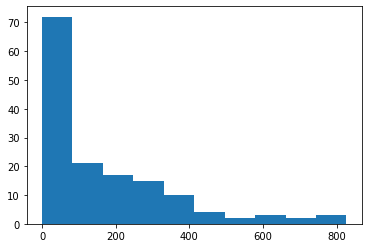

In [13]:
#Most of the zipcodes have very few missing values and others have hundreds
plt.hist(to_graph['Bldg Type'])
plt.show()

In [14]:
engine = create_engine('sqlite:///permitsdb.sql', echo=False)
permits.to_sql('permits', con=engine, if_exists='replace')
POPULATION.to_sql('POPULATION', con=engine, if_exists='replace')

In [15]:
os.environ["DATABASE_URL"]='sqlite:///permitsdb.sql'

In [16]:
%%sql

SELECT * FROM permits LIMIT 5

Done.


index,BOROUGH,BIN,Number,Street,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,Community Board,Postcode,Bldg Type,Residential,Special District 1,Special District 2,Work Type,Permit Status,Filing Status,Permit Type,Permit Sequence #,Permit Subtype,Oil Gas,Site Fill,Filing Date,Issuance Date,Expiration Date,Job Start Date,Permittee's First Name,Permittee's Last Name,Permittee's Business Name,Permittee's Phone #,Permittee's License Type,Permittee's License #,Act as Superintendent,Permittee's Other Title,HIC License,Site Safety Mgr's First Name,Site Safety Mgr's Last Name,Site Safety Mgr Business Name,Superintendent First & Last Name,Superintendent Business Name,Owner's Business Type,Non-Profit,Owner's Business Name,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,Latitude,Longitude,Council District,Census Tract,BBL,NTA
0,BRONX,2118801,2960,WEBSTER AVENUE,201088492,4,NB,None,3274.0,4,207,10458.0,2.0,None,None,None,PL,ISSUED,INITIAL,PL,1,None,None,None,2010-11-05 00:00:00.000000,2010-11-05 00:00:00.000000,2011-11-05 00:00:00.000000,2010-11-05 00:00:00.000000,LAWRENCE,LEVINE,"PAR PLUMBING CO., INC",2129261088,MASTER PLUMBER,161,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016-01-03T00:00:00,40.86749,-73.883225,11.0,425.0,2032740001.0,Norwood
1,BRONX,2096812,100,DEKRUIF PLACE,200716298,2,A2,None,5141.0,120,209,10475.0,2.0,None,None,None,EQ,ISSUED,RENEWAL,EQ,12,FN,None,NONE,2012-01-30 00:00:00.000000,2012-01-30 00:00:00.000000,2013-01-29 00:00:00.000000,2002-08-08 00:00:00.000000,ANTHONY,RASULO,RIVERBAY CORP,7183203300,GENERAL CONTRACTOR,1962,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016-01-03T00:00:00,40.875769,-73.828899,12.0,46201.0,2051410120.0,Co-op City
2,BRONX,2008604,1898,HARRISON AVENUE,200974650,2,A2,None,2869.0,87,205,10453.0,2.0,None,None,None,PL,ISSUED,RENEWAL,PL,3,None,None,NONE,2008-02-04 00:00:00.000000,2008-02-04 00:00:00.000000,2009-02-03 00:00:00.000000,2005-08-29 00:00:00.000000,OSCAR,JACKSON,PERFECT PLUMBING & HETING CORP,7185157055,MASTER PLUMBER,594,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016-01-03T00:00:00,40.852603,-73.911461,14.0,243.0,2028690087.0,University Heights-Morris Heights
3,BRONX,2007652,1998,MORRIS AVENUE,200278118,2,A1,None,2807.0,15,205,10453.0,1.0,None,None,None,PL,ISSUED,INITIAL,PL,1,None,None,NONE,1998-08-31 00:00:00.000000,1998-08-31 00:00:00.000000,1999-08-31 00:00:00.000000,1998-08-31 00:00:00.000000,GERI,KAUUMBA,GOWIE PLUMBING,7188821281,MASTER PLUMBER,1137,Y,None,None,None,None,None,GOWIE PLUMBING,GOWIE PLUMBING,None,None,None,None,None,None,None,None,None,None,None,2016-01-03T00:00:00,40.851661,-73.906937,14.0,241.0,2028070015.0,Mount Hope
4,BRONX,2084155,565,WEST 235 STREET,201119173,2,A2,Y,5794.0,484,208,10463.0,2.0,None,None,None,MH,ISSUED,INITIAL,EW,1,MH,None,NONE,2007-04-30 00:00:00.000000,2007-04-30 00:00:00.000000,2008-01-08 00:00:00.000000,2007-04-30 00:00:00.000000,GARY,ZYSMAN,THE DU-RITE INC,2013877000,GENERAL CONTRACTOR,9872,Y,None,None,None,None,None,THE DU-RITE INC,THE DU-RITE INC,None,None,None,None,None,None,None,None,None,None,None,2016-01-03T00:00:00,40.88572,-73.91027,11.0,297.0,2057940484.0,Spuyten Duyvil-Kingsbridge


In [17]:
%%sql

SELECT * FROM POPULATION LIMIT 5;

 * sqlite:///permitsdb.sql
Done.


index,Zip Code ZCTA,2010 Census Population
0,1001,16769
1,1002,29049
2,1003,10372
3,1005,5079
4,1007,14649


In [18]:
%%sql
SELECT COUNT("Filing Status") FROM permits
WHERE "Filing Status" = "RENEWAL"
LIMIT 5

 * sqlite:///permitsdb.sql
Done.


"COUNT(""Filing Status"")"
271030


In [24]:
%%sql 
SELECT BOROUGH, COUNT() AS COUNT 
FROM permits 
WHERE (SELECT ("Expiration Date" - "Issuance Date") AS DATE_DIFF)>=1
GROUP BY BOROUGH
ORDER BY COUNT DESC
LIMIT 5;

 * sqlite:///permitsdb.sql
Done.


BOROUGH,COUNT
BROOKLYN,367617
MANHATTAN,217507
BRONX,147328


In [23]:
%%sql
SELECT BOROUGH, MAX(COUNT)
FROM (SELECT BOROUGH,COUNT(*) AS COUNT 
FROM permits
WHERE (SELECT ("Expiration Date" - "Issuance Date") AS DATE_DIFF)>=1
GROUP BY BOROUGH)
LIMIT 5;

 * sqlite:///permitsdb.sql
Done.


BOROUGH,MAX(COUNT)
BROOKLYN,367617


In [44]:
%%sql
SELECT highest_permit_issuance/permit_total
FROM 
    (SELECT BOROUGH, CAST(MAX(permit_count) AS FLOAT) AS highest_permit_issuance, CAST(SUM(permit_count) AS FLOAT) AS permit_total
        FROM (SELECT BOROUGH, COUNT() AS permit_count
                FROM permits
                WHERE (SELECT ("Expiration Date" - "Issuance Date") AS DATE_DIFF)>=1
                GROUP BY BOROUGH)
                
    )
LIMIT 5;

 * sqlite:///permitsdb.sql
Done.


highest_permit_issuance/permit_total
0.5018991005553948


In [45]:
%%sql 
SELECT COUNT()
FROM permits 
WHERE "Owner's Business Type"="CORPORATION" AND "Filing Status" = "RENEWAL"
LIMIT 5;

 * sqlite:///permitsdb.sql
Done.


COUNT()
78144


In [35]:
%%sql
WITH CORP_COUNT AS
    (SELECT "Owner's Business Type", COUNT(*) AS COUNT
        FROM permits
        WHERE "Filing Status" = "RENEWAL" AND "Owner's Business Type" ="CORPORATION"
        GROUP BY "Owner's Business Type"),
    INDIVIDUAL_COUNT AS
    (SELECT "Owner's Business Type", COUNT(*) AS COUNT
    FROM permits
    WHERE  "Filing Status" = "RENEWAL" AND "Owner's Business Type" ="INDIVIDUAL"
    GROUP BY "Owner's Business Type")
SELECT CAST(CORP_COUNT.COUNT AS FLOAT)/INDIVIDUAL_COUNT.COUNT AS "CORPORATION TO INDIVIDUAL RATIO"
FROM CORP_COUNT, INDIVIDUAL_COUNT
LIMIT 5;

 * sqlite:///permitsdb.sql
Done.


CORPORATION TO INDIVIDUAL RATIO
0.9884888810180383


In [60]:
%%sql 
SELECT Postcode, COUNT(*) AS NUM_PERMITS
FROM permits
WHERE "Filing Date" BETWEEN '2010-01-01 00:00:00.000' AND '2010-12-31 23:59:59.998'
GROUP BY Postcode
ORDER BY COUNT(*) DESC
LIMIT 5;

 * sqlite:///permitsdb.sql
Done.


Postcode,NUM_PERMITS
11201.0,2179
11215.0,1552
11211.0,1288
11238.0,1211
11220.0,1187


In [76]:
%%sql
SELECT Postcode, COUNT("Job #") AS NUM_PERMITS, POPULATION."2010 Census Population" As CENSUS_POP, CAST(COUNT("Job #") AS FLOAT)/POPULATION."2010 Census Population" AS RATIO
FROM permits
LEFT JOIN POPULATION
ON POPULATION."Zip Code ZCTA" = permits.Postcode
WHERE POPULATION."2010 Census Population" >=1000 AND permits."Filing Date" BETWEEN '2010-01-01 00:00:00.000' AND '2010-12-31 23:59:59.998'
GROUP BY Postcode
ORDER BY COUNT(*) DESC
LIMIT 5

 * sqlite:///permitsdb.sql
Done.


Postcode,NUM_PERMITS,CENSUS_POP,RATIO
11201.0,2179,51128,0.04261852605226099
11215.0,1552,63488,0.02444556451612903
11211.0,1288,90117,0.014292530821043755
11238.0,1211,49262,0.02458284275912468
11220.0,1187,99598,0.011917909998192734


In [77]:
sql_query = '''SELECT Postcode, COUNT("Job #") AS NUM_PERMITS, POPULATION."2010 Census Population" As CENSUS_POP, CAST(COUNT("Job #") AS FLOAT)/POPULATION."2010 Census Population" AS RATIO
FROM permits
LEFT JOIN POPULATION
ON POPULATION."Zip Code ZCTA" = permits.Postcode
WHERE POPULATION."2010 Census Population" >=1000 AND permits."Filing Date" BETWEEN '2010-01-01 00:00:00.000' AND '2010-12-31 23:59:59.998'
GROUP BY Postcode
ORDER BY COUNT(*) DESC
LIMIT 5'''
joined = pd.read_sql_query(sql_query, con='sqlite:///permitsdb.sql')
print(joined.head())

   Postcode  NUM_PERMITS  CENSUS_POP     RATIO
0   11201.0         2179       51128  0.042619
1   11215.0         1552       63488  0.024446
2   11211.0         1288       90117  0.014293
3   11238.0         1211       49262  0.024583
4   11220.0         1187       99598  0.011918


In [53]:
joined['zscore'] = stats.zscore(joined['RATIO'])

In [54]:
len(joined[joined['zscore']>=2])

3

In [55]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [56]:
%%sql

SELECT strftime("%Y", "Issuance Date"), COUNT(*) 
FROM permits
GROUP BY strftime("%Y", "Issuance Date")
LIMIT 5;

 * sqlite:///permitsdb.sql
Done.


"strftime(""%Y"", ""Issuance Date"")",COUNT(*)
1989,177
1990,7499
1991,20038
1992,23367
1993,25595


In [47]:
%%sql

SELECT "Job Start Date"
FROM permits
LIMIT 5;

 * sqlite:///permitsdb.sql
Done.


Job Start Date
2010-11-05T00:00:00
2002-08-08T00:00:00
2005-08-29T00:00:00
1998-08-31T00:00:00
2007-04-30T00:00:00


In [62]:
%%sql
WITH SUMMER_COUNT AS
 (SELECT strftime('%m', "Job Start Date") AS MonthStart, strftime('%Y', "Job Start Date") AS YearStart, COUNT(*) AS NUM_PERMITS
    FROM permits
    GROUP BY "Job Start Date"
    HAVING YearStart > "1989" AND YearStart < "2013" AND MonthStart IN ("07", "08")),
    
    WINTER_COUNT AS
        (SELECT strftime('%m', "Job Start Date") AS MonthStart, strftime('%Y', "Job Start Date") AS YearStart, COUNT(*) AS NUM_PERMITS
            FROM permits
            GROUP BY "Job Start Date"
            HAVING YearStart > "1989" AND YearStart < "2013" AND MonthStart IN ("01", "02")),
    JOINED AS
    (SELECT SUMMER_COUNT.YearStart, SUM(SUMMER_COUNT.NUM_PERMITS) AS SUMMER, SUM(WINTER_COUNT.NUM_PERMITS) AS WINTER
    FROM SUMMER_COUNT 
    LEFT JOIN WINTER_COUNT
    ON SUMMER_COUNT.YearStart=WINTER_COUNT.YearStart
    GROUP BY SUMMER_COUNT.YearStart)
SELECT YearStart, SUMMER, WINTER, CAST(SUMMER AS FLOAT)/WINTER AS "SUMMER TO WINTER PERMIT APPROVAL RATIO"
FROM JOINED
LIMIT 5;

 * sqlite:///permitsdb.sql
Done.


YearStart,SUMMER,WINTER,SUMMER TO WINTER PERMIT APPROVAL RATIO
1990,92778,16720,5.548923444976077
1991,213876,137696,1.5532477341389728
1992,194392,202811,0.9584884449068345
1993,197480,186396,1.0594647953818752
1994,191856,172208,1.1140945832946205


In [63]:
%%sql

SELECT strftime('%m', "Job Start Date") AS MonthStart, CAST((julianday("Expiration Date") - julianday("Issuance Date")) AS integer) AS PermitLength
FROM permits
WHERE permits."Job Start Date" BETWEEN '1990-01-01 00:00:00.000' AND '2012-12-31 23:59:59.998'
LIMIT 5;

 * sqlite:///permitsdb.sql
Done.


MonthStart,PermitLength
11,365
08,365
08,365
08,365
04,253


In [11]:
sql_query = '''SELECT strftime('%m', "Job Start Date") AS MonthStart, CAST((julianday("Expiration Date") - julianday("Issuance Date")) AS integer) AS PermitLength
FROM permits
WHERE permits."Job Start Date" BETWEEN "1990-01-01 00:00:00.000" AND "2012-12-31 23:59:59.998"'''
chisq_test = pd.read_sql_query(sql_query, con='sqlite:///permitsdb.sql')

In [12]:
print(chisq_test)
chisq_test['MonthStart'] = chisq_test['MonthStart'].astype(int)
chisq_test.dtypes

        MonthStart  PermitLength
0               11         365.0
1               08         365.0
2               08         365.0
3               08         365.0
4               04         253.0
...            ...           ...
1033844         08         129.0
1033845         08         365.0
1033846         02          12.0
1033847         05         365.0
1033848         09         185.0

[1033849 rows x 2 columns]


MonthStart        int32
PermitLength    float64
dtype: object

In [13]:
chisq_test_grouped = chisq_test.groupby(['MonthStart']).mean()

In [14]:
chisq_test_grouped

,PermitLength
MonthStart,
1,270.299757
2,266.453262
3,268.992811
4,270.919288
5,271.081427
6,268.274203
7,269.485996
8,264.258961
9,260.661893


In [15]:
stats.chisquare(chisq_test_grouped)

Power_divergenceResult(statistic=array([1.11025396]), pvalue=array([0.99991447]))